Three Takeaways:

1. In their 100 most recent tweets, each of five major news outlets expresses more negative sentiment than positive sentiment. All five outlets receive mean Vader scores below 0, signifying overall negative sentiment. 

2. Each outlet tweets a good number of emotionally salient statements. Positive and negative tweets are more common than neutral tweets, which receive Vader scores of about 0.

3. Negative tweets are more salient than positive tweets. When outlets tweet negative statements, these commonly receive Vader scores below -0.75, signifying strong negativity. Positive tweets rarely receive scores above 0.75.

In [41]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tweepy
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [42]:
consumerkey='SVmAx1PMTyT9zhydHDRzzZx5E'
consumersecret='4t1In2jr90E0NYjUKq5O1pfxdb9pmZkZxdtnn0W469bI2Xzhgd'
accesstoken='979124724012855296-bFuii1batR00bMkarTcWUDzHg89P5hg'
accesssecret='Pozvx42D2KZZM0dxsY8oT1rhtI2IY34yo2SDXjAreB8Vy'

auth = tweepy.OAuthHandler(consumerkey, consumersecret)
auth.set_access_token(accesstoken, accesssecret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [43]:
news_list=['BBCNews', 'CBSNews','cnnbrk', 'FoxNews', 'nytimes']
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_text=[]
org=[]
counter=[]
runningcounter=0

In [44]:
for newsorg in news_list:
    for x in range(1, 6):
        public_tweets =  api.user_timeline(newsorg, page=x)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            text=tweet['text']


            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            org.append(newsorg)
            tweet_text.append(text)

In [49]:
tweet_number=[]
for i in range(100):
    no=i+1
    tweet_number.append(no)

for i in range(100):
    no=i+1
    tweet_number.append(no)
    
for i in range(100):
    no=i+1
    tweet_number.append(no)

for i in range(100):
    no=i+1
    tweet_number.append(no)

for i in range(100):
    no=i+1
    tweet_number.append(no)

newssentiment_df=pd.DataFrame({"Tweet Number": tweet_number,
                               "Outlet": org,
                               "Compound Sentiment": compound_list,
                               "Positive Sentiment": positive_list,
                               "Negative Sentiment": negative_list,
                              "Neutral Sentiment": neutral_list,
                              'Text': tweet_text})

newssentiment_df.head(500)

,Compound Sentiment,Negative Sentiment,Neutral Sentiment,Outlet,Positive Sentiment,Text,Tweet Number
0,-0.7717,0.489,0.511,BBCNews,0.000,Two men dead after Edgware 'carbon monoxide le...,1
1,0.7003,0.000,0.746,BBCNews,0.254,RT @BBCSport: Day 4 - Commonwealth Games #GC20...,2
2,-0.8720,0.553,0.447,BBCNews,0.000,Hackney stabbing: Second stab death suspect 'a...,3
3,0.0000,0.000,1.000,BBCNews,0.000,RT @BBC_HaveYourSay: Are you coming to Windsor...,4
4,-0.4588,0.231,0.769,BBCNews,0.000,Sunday Times' Rod Liddell 'mocks Wales' over S...,5
5,-0.5106,0.323,0.677,BBCNews,0.000,Fishermen protest over lack of control of UK w...,6
6,0.0000,0.000,1.000,BBCNews,0.000,UK wife-carrying contest takes place in Dorkin...,7
7,0.7003,0.000,0.746,BBCNews,0.254,RT @BBCSport: Day 4 - Commonwealth Games #GC20...,8
8,-0.1531,0.127,0.873,BBCNews,0.000,Tony Blair believes NI deal 'still possible' b...,9
9,-0.4019,0.231,0.769,BBCNews,0.000,Man injured wrestling Derbyshire ram calls it ...,10


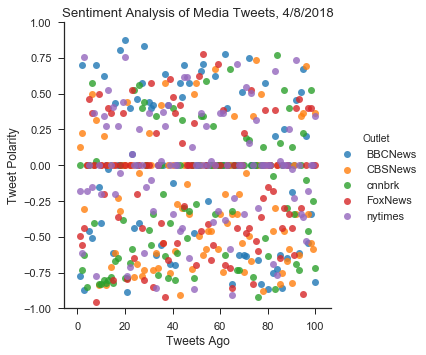

In [50]:
plt.figure(figsize=(15,12))
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('Tweet Number', 'Compound Sentiment', data=newssentiment_df, hue='Outlet', fit_reg=False)
plt.title('Sentiment Analysis of Media Tweets, 4/8/2018')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.ylim((-1, 1))
plt.savefig('sns.png')

In [51]:
compound=[]
for newsorg in news_list:
    compoundfilter=newssentiment_df.loc[newssentiment_df["Outlet"] ==newsorg,:]
    compound.append(np.mean(compoundfilter['Compound Sentiment']))
print(compound)

[-0.017182000000000003, -0.21541800000000003, -0.21707600000000002, -0.12436300000000002, -0.02302600000000001]


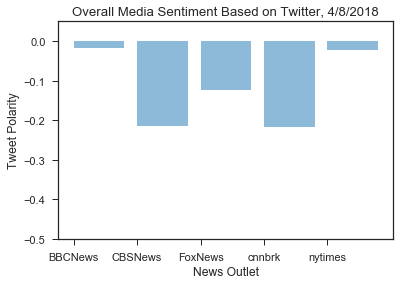

In [53]:
plt.bar(news_list, compound, alpha=0.5, align="edge")

plt.ylim(-.5, 0.05)
plt.title("Overall Media Sentiment Based on Twitter, 4/8/2018")
plt.xlabel("News Outlet")
plt.ylabel("Tweet Polarity")
plt.savefig('bar.png')

In [54]:
newssentiment_df.to_csv('News Sentiment.csv')